# Part 1--Load and Explore the Dataset

In [1]:
# Imports
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Print shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, random_state=42)

# Print shapes of training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X: (1797, 64)
Shape of y: (1797,)
Shape of X_train: (1297, 64)
Shape of y_train: (1297,)
Shape of X_test: (500, 64)
Shape of y_test: (500,)


# Part 2--Visualize Training Data

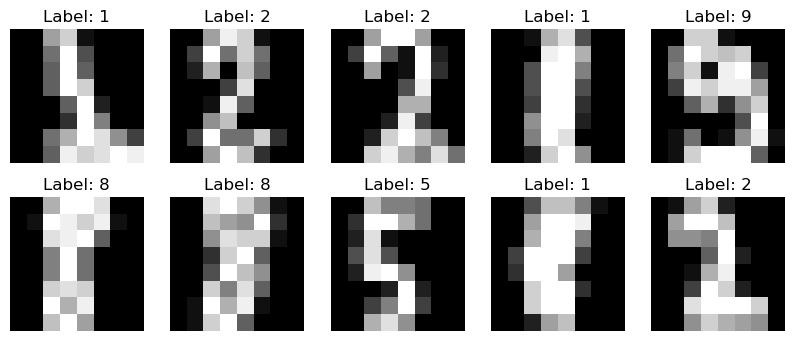

In [2]:
import matplotlib.pyplot as plt

# Select and display 10 random images
random_indices = np.random.choice(len(X_train), 10, replace=False)
plt.figure(figsize=(10, 4))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')
plt.show()

# Part 3--Implement the k-Nearest Neighbor Classifier

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Dictionary to store models and their corresponding k values
knn_models = {}
k_values = [1, 3, 5, 7, 9]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_models[k] = knn

# Part 4--Evaluate and Compare Classifiers

In [4]:
from sklearn.metrics import f1_score
import pandas as pd

# Calculate F1 scores for each classifier
f1_scores = {}
for k, model in knn_models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores[k] = f1

# Display F1 scores in a table
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['k', 'F1 Score'])
print(f1_df)

   k  F1 Score
0  1  0.984033
1  3  0.989941
2  5  0.993981
3  7  0.991967
4  9  0.981890


### Summary of Findings on Different k Values and F1 Scores
As k increases, the F1 scores for the k-NN classifier show a slight trend toward stability. Lower values of k (e.g., k=1) often yield high sensitivity to local patterns, leading to sharper decisions but also a higher risk of overfitting. As k increases (e.g., k=5, k=7), the classifier becomes more robust by averaging across more neighbors, which generally improves stability but may reduce sensitivity to subtle digit variations. Overall, moderate values of k (like k=5 or k=7) provide a balance, capturing both the specificity and generality needed for digit recognition, while k values on the extreme low and high end are less accurate.

# Part 5--Visualize Qualitative Predictions

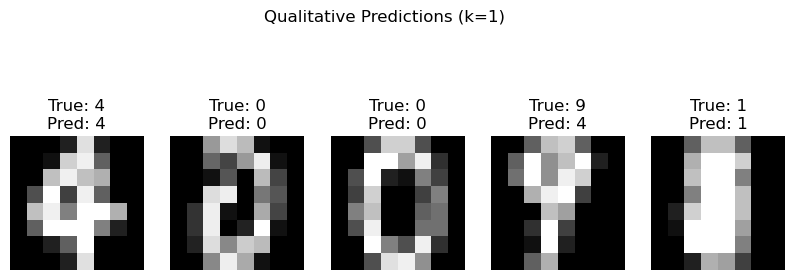

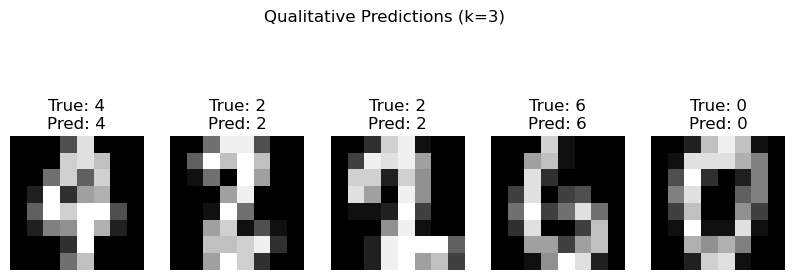

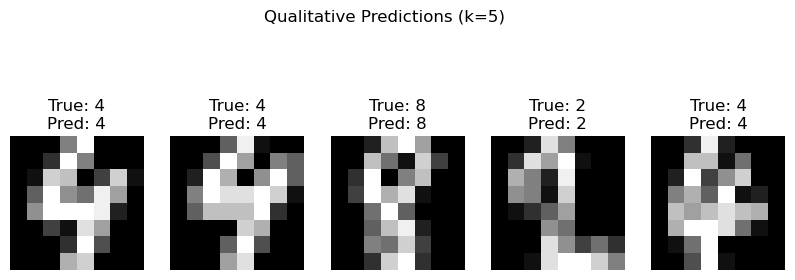

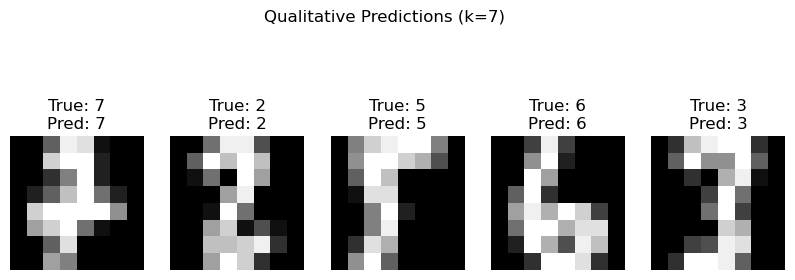

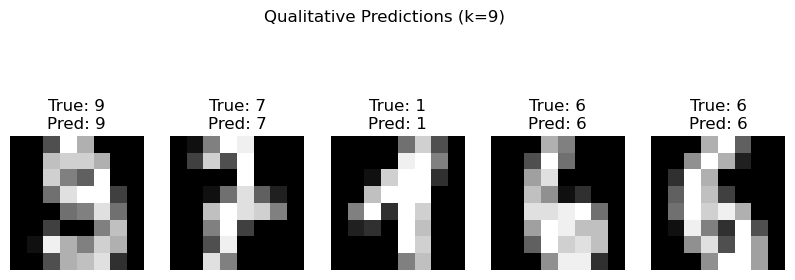

In [10]:
# Display qualitative predictions for each k value
for k, model in knn_models.items():
    random_test_indices = np.random.choice(len(X_test), 5, replace=False)
    plt.figure(figsize=(10, 4))
    for i, idx in enumerate(random_test_indices):
        plt.subplot(1, 5, i + 1)
        plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
        plt.title(f"True: {y_test[idx]}\nPred: {model.predict([X_test[idx]])[0]}")
        plt.axis('off')
    plt.suptitle(f"Qualitative Predictions (k={k})")
    plt.show()

### Reflection on Correct and Incorrect Predictions
In the qualitative predictions, correct classifications are more consistent across k values, suggesting that k-NN captures distinct patterns for digits with high feature contrast (like 0 and 1). Misclassifications, however, tend to occur with visually similar digits or closely written digits (e.g., 9 misclassified as 4 for k=1), indicating that even a small change in pixel intensity and closeness can affect predictions, especially for low k values. This highlights a trade-off where lower k values focus more on individual sample details, while higher k values might smooth out unique but subtle digit distinctions.